In [1]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
cd "drive/My Drive/Deep-Learning/Research/Beijing Housing Price/"

/content/drive/My Drive/Deep-Learning/Research/Beijing Housing Price


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import visual_utils
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
plt.style.use('default')

df = pd.read_csv("Final_Dataset.csv")

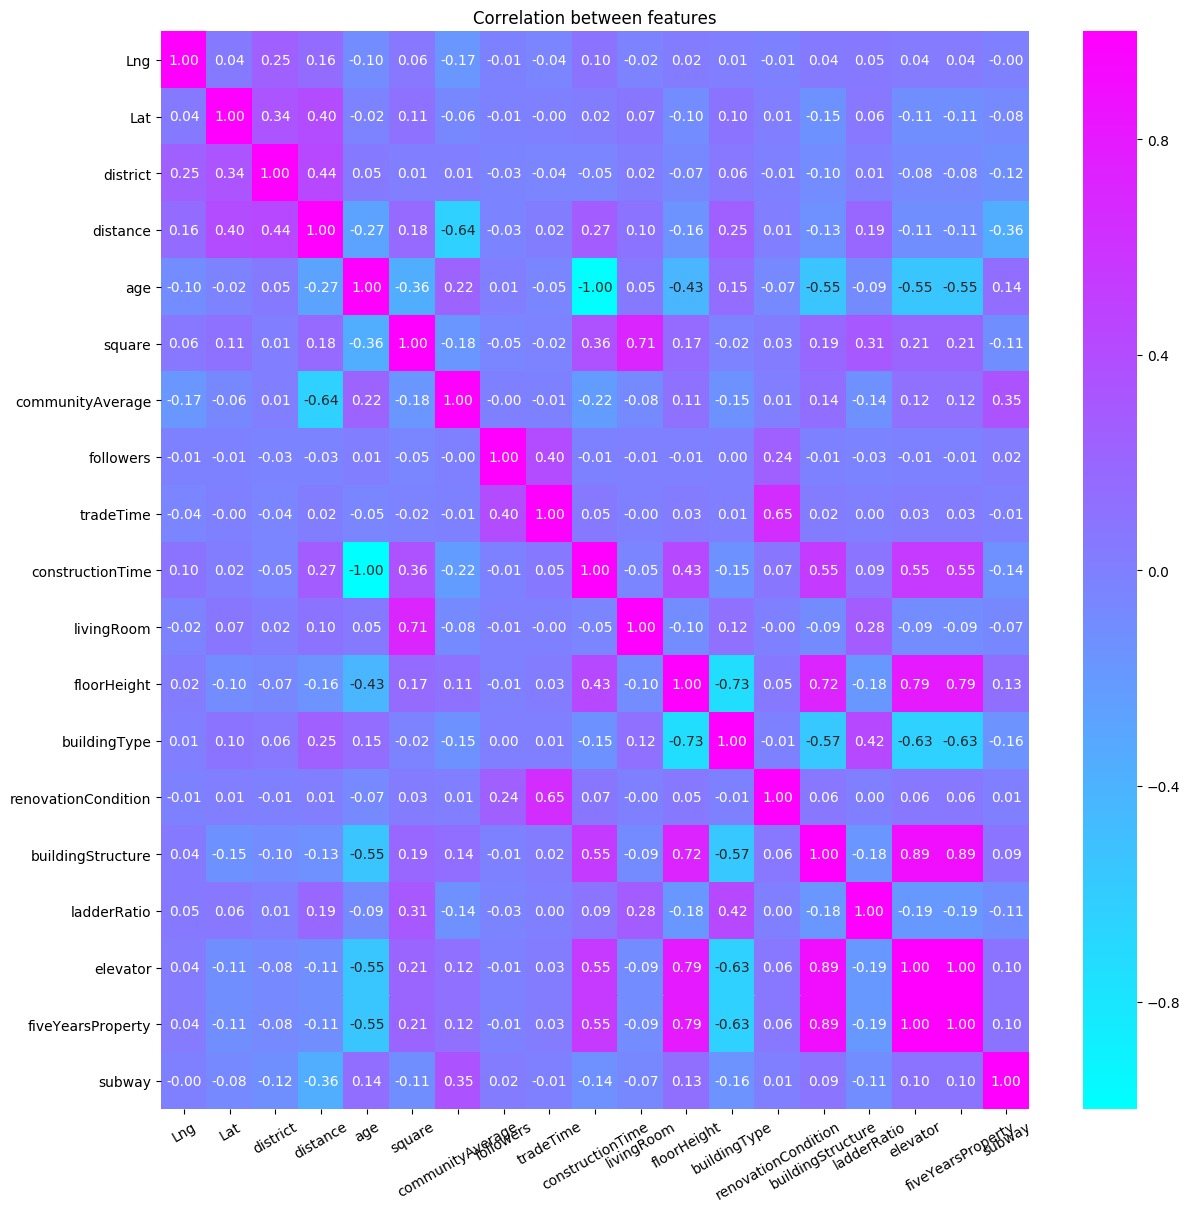

In [0]:
#%% Correlation between features
plt.figure(figsize=(14,14))
g = sns.heatmap(df.iloc[:, 2:].corr(), annot= True, fmt= ".2f", cmap= "cool")
plt.xticks(rotation= 30)
plt.title("Correlation between features")
plt.savefig("Correlation", bbox_inches= "tight", dpi= 250)

In [0]:
df.head(10)

,url,price,Lng,Lat,district,distance,age,square,communityAverage,followers,tradeTime,constructionTime,livingRoom,floorType,floorHeight,buildingType,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway
0,https://bj.lianjia.com/chengjiao/101084782030....,31680,116.475489,40.019520,7,0.133921,14,131.00,56021.0,106,2016,2005,2,High,26,1,3,6,0.217,1,1,1
1,https://bj.lianjia.com/chengjiao/101086012217....,43436,116.453917,39.881534,7,0.051745,15,132.38,71539.0,126,2016,2004,2,High,22,1,4,6,0.667,1,1,0
2,https://bj.lianjia.com/chengjiao/101086406841....,22202,116.438010,40.076114,6,0.174618,11,134.00,51238.0,138,2016,2008,3,Bottom,21,1,1,6,0.273,1,1,0
3,https://bj.lianjia.com/chengjiao/101087277815....,52000,116.466280,39.991363,7,0.105187,14,53.00,67738.0,57,2016,2005,1,Middle,8,4,3,6,0.333,1,1,0
4,https://bj.lianjia.com/chengjiao/101087292623....,37672,116.482586,39.891991,7,0.076171,22,73.00,50112.0,167,2016,1997,2,High,6,4,4,2,0.500,0,0,0
5,https://bj.lianjia.com/chengjiao/101087508625....,55883,116.453086,39.898397,1,0.046053,10,68.00,78590.0,134,2016,2009,1,Middle,23,1,4,6,0.308,1,1,1
6,https://bj.lianjia.com/chengjiao/101087919464....,35568,116.296286,39.870107,2,0.116227,18,80.13,53588.0,90,2016,2001,1,High,24,1,4,6,0.222,1,1,1
7,https://bj.lianjia.com/chengjiao/101087921597....,60607,116.329220,39.892447,2,0.079058,29,59.40,59395.0,76,2016,1990,2,High,26,1,3,6,0.250,1,1,1
8,https://bj.lianjia.com/chengjiao/101087957433....,32981,116.284755,39.934530,8,0.126340,10,64.28,70141.0,6,2016,2009,1,Middle,19,1,3,6,0.111,1,1,1
9,https://bj.lianjia.com/chengjiao/101088008763....,30189,116.603852,39.893276,7,0.196755,11,111.30,48859.0,130,2016,2008,2,Middle,6,4,4,6,0.167,1,1,0


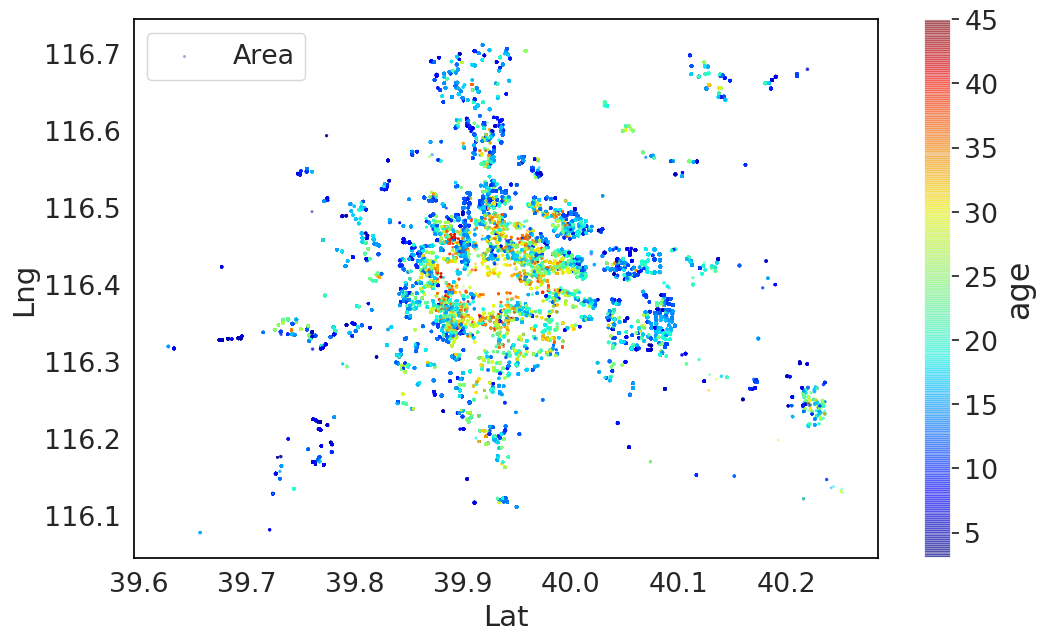

In [14]:
# Age Distribution based on Coordinate
sns.set(font_scale= 1.75)
ax = df.plot(kind= "scatter", x= "Lat", y= "Lng", c= "age", s= df["square"]/50, label= "Area", cmap= plt.get_cmap("jet"), colorbar= True, alpha= 0.4, figsize=(12,7), sharex= False)
ax.figure.axes[-1].yaxis.label.set_size(23)
ax.set_facecolor('white')
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black') 
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
ax.legend(facecolor= "white")
plt.savefig("Age Distribution", bbox_inches= "tight", dpi= 250)

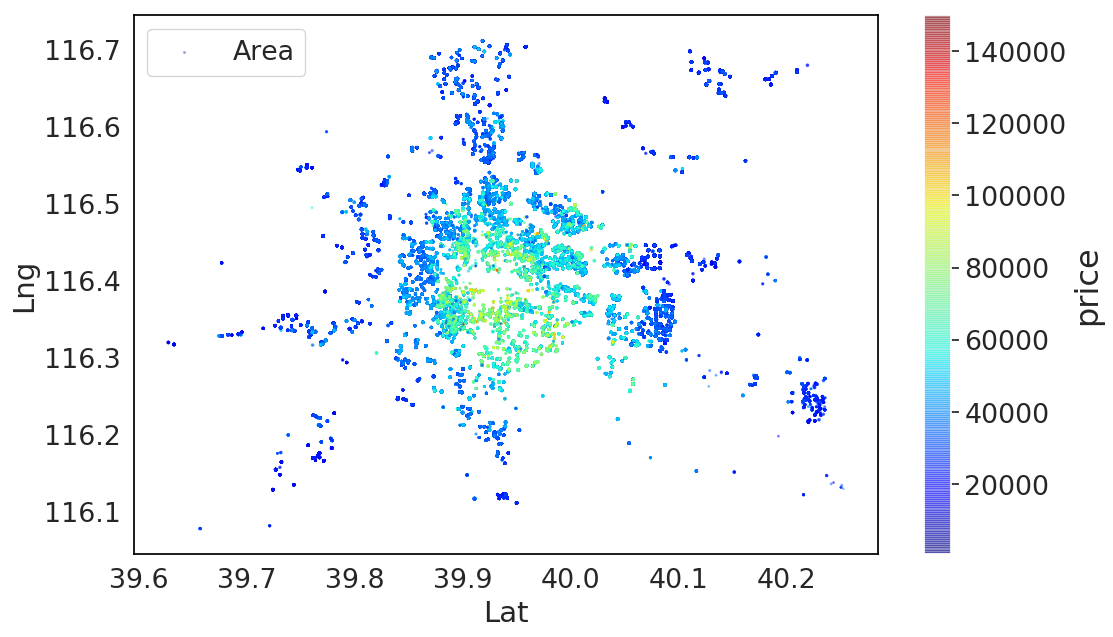

In [16]:
#%% Price Distribution based on Coordinate
sns.set(font_scale= 1.75)
ax = df.plot(kind= "scatter", x= "Lat", y= "Lng", c= "price", s= df["square"]/50, label= "Area", cmap= plt.get_cmap("jet"), colorbar= True, alpha= 0.4, figsize=(12,7), sharex= False)
ax.figure.axes[-1].yaxis.label.set_size(23)
ax.set_facecolor('white')
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black') 
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
ax.legend(facecolor= "white")
plt.savefig("Price Distribution", bbox_inches= "tight", dpi= 250)

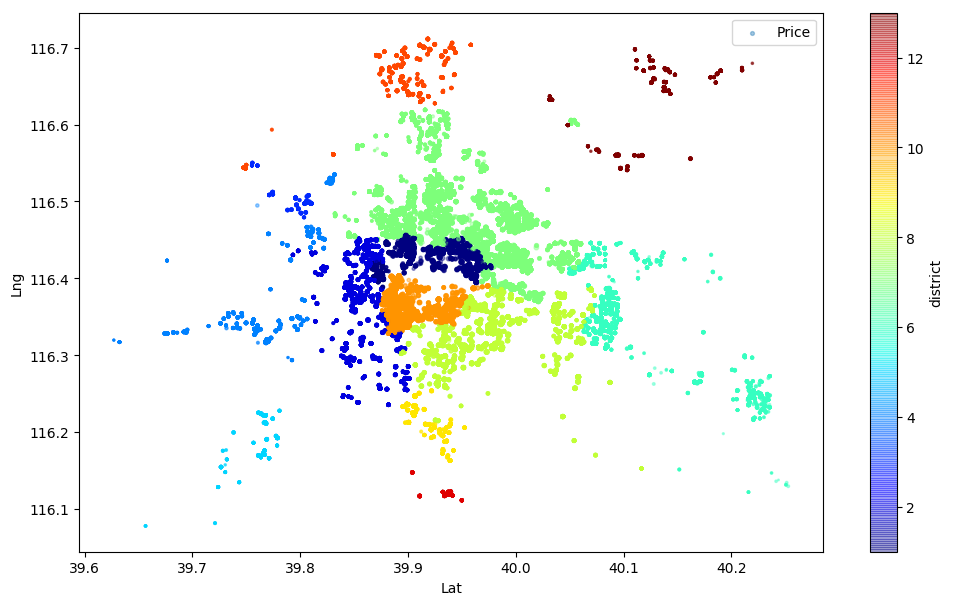

In [0]:
#%% District Distribution based on Coordinate
df.plot(kind= "scatter", x= "Lat", y= "Lng", c= "district", s= df["price"]/10000, label= "Price", cmap= plt.get_cmap("jet"), colorbar= True, alpha= 0.4, figsize=(12,7), sharex= False)
plt.savefig("District", bbox_inches= "tight", dpi= 250)

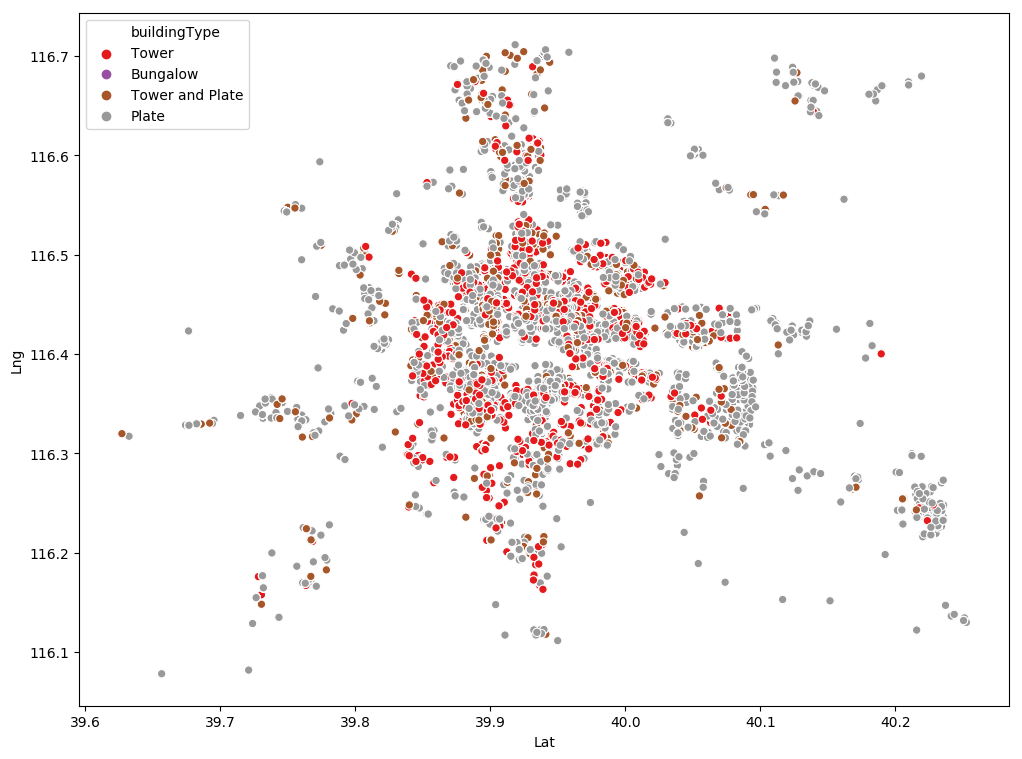

In [0]:
#%% buildingType Distribution based on Location
plt.figure(figsize=(12, 9))
g = sns.scatterplot(data= df, x= "Lat", y= "Lng", hue= "buildingType", palette= "Set1")

# Assumes Seaborn 0.9.0
legend = g.legend_

# Set legend title
legend.get_texts()[0].set_text('buildingType')

labels=['Tower', 'Bungalow', 'Tower and Plate', 'Plate']

# Set legend labels
for i, label in enumerate(labels):
    # i+1 because i=0 is the title, and i starts at 0
    legend.get_texts()[i+1].set_text(label) 

# sns.plt.show() for me gives "AttributeError: module 'seaborn' has no attribute 'plt'"
plt.savefig("buildingType Distribution", bbox_inches= "tight", dpi= 250)
plt.show()

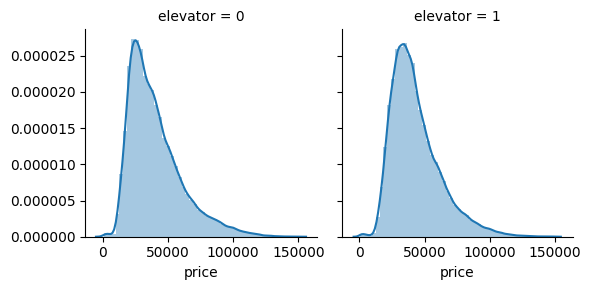

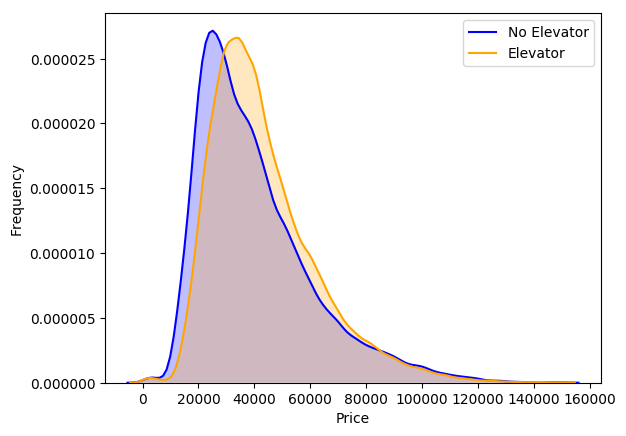

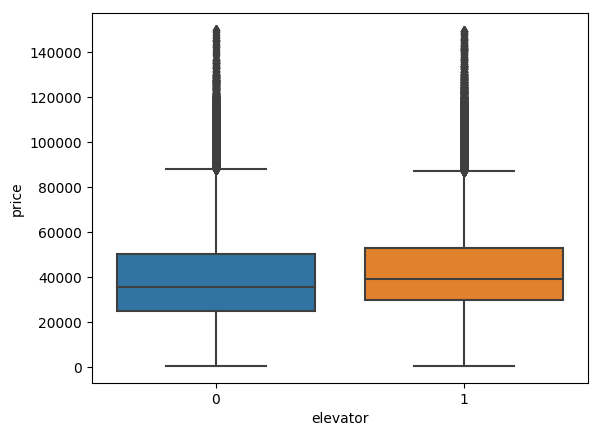

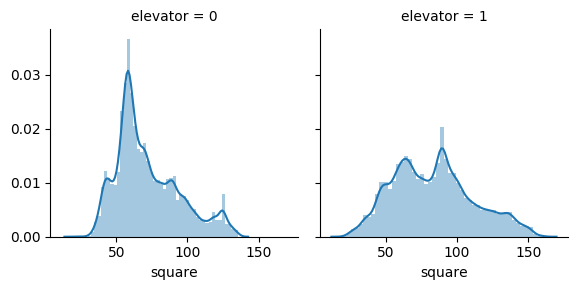

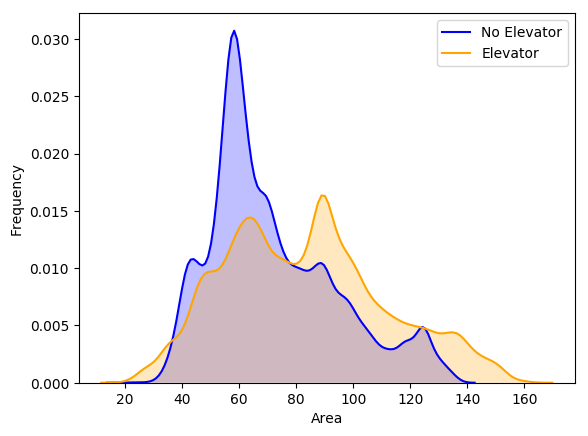

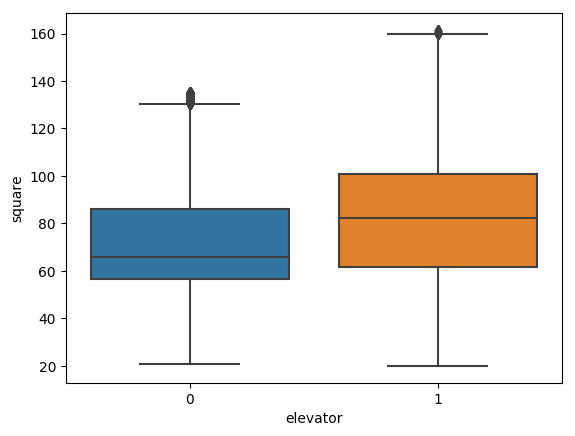

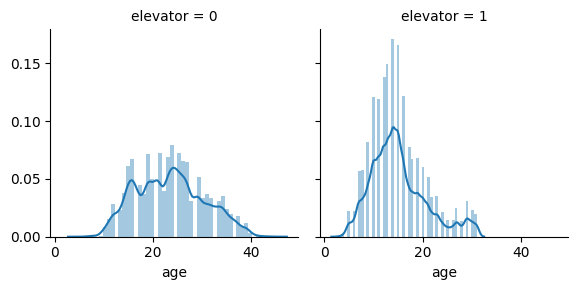

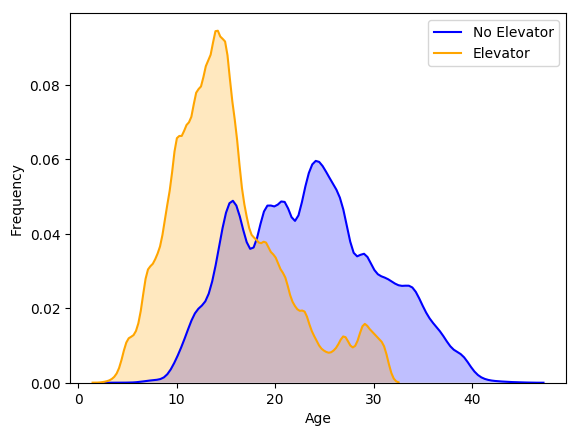

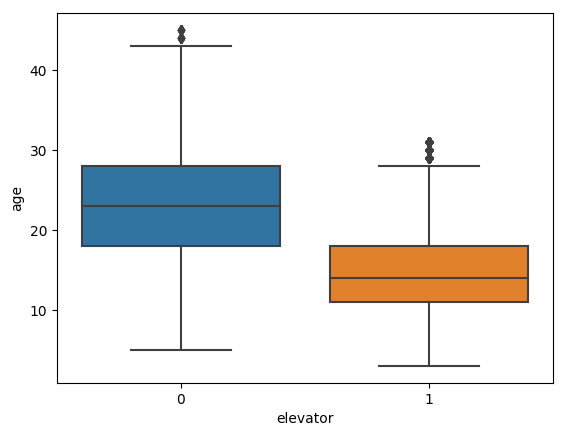

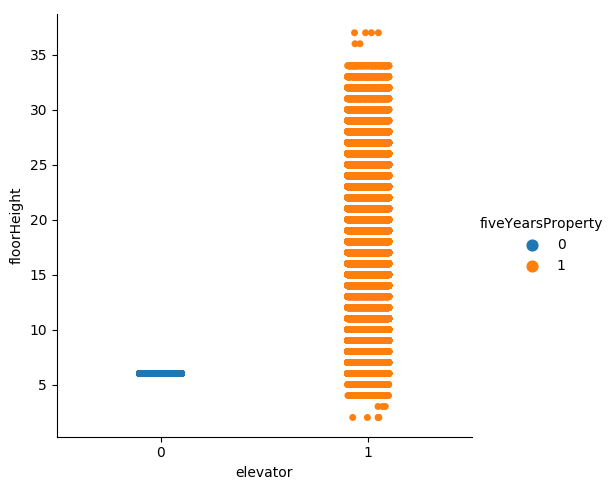

In [0]:
#%% Elevator Distribution by Price
g = sns.FacetGrid(data= df, col= 'elevator')
g = g.map(sns.distplot, 'price')
plt.savefig("Elevator 1", bbox_inches= "tight", dpi= 250)
plt.show()
plt.close()

g = sns.kdeplot(df["price"][(df["elevator"] == 0)], color="Blue", shade = True)
g = sns.kdeplot(df["price"][(df["elevator"] == 1)], ax =g, color="Orange", shade= True)
g.set_xlabel("Price")
g.set_ylabel("Frequency")
g = g.legend(["No Elevator","Elevator"])
plt.savefig("Elevator 2", bbox_inches= "tight", dpi= 250)
plt.show()
plt.close()

g = sns.boxplot(data= df, x= "elevator", y= "price")
plt.savefig("Elevator 3", bbox_inches= "tight", dpi= 250)

#%% Elevator Distribution by Area
g = sns.FacetGrid(data= df, col= 'elevator')
g = g.map(sns.distplot, 'square')
plt.savefig("Elevator 4", bbox_inches= "tight", dpi= 250)
plt.show()
plt.close()

g = sns.kdeplot(df["square"][(df["elevator"] == 0)], color="Blue", shade = True)
g = sns.kdeplot(df["square"][(df["elevator"] == 1)], ax =g, color="Orange", shade= True)
g.set_xlabel("Area")
g.set_ylabel("Frequency")
g = g.legend(["No Elevator","Elevator"])
plt.savefig("Elevator 5", bbox_inches= "tight", dpi= 250)
plt.show()
plt.close()

g = sns.boxplot(data= df, x= "elevator", y= "square")
plt.savefig("Elevator 6", bbox_inches= "tight", dpi= 250)

#%% Elevator Distribution by Age
g = sns.FacetGrid(data= df, col= 'elevator')
g = g.map(sns.distplot, 'age')
plt.savefig("Elevator 7", bbox_inches= "tight", dpi= 250)
plt.show()
plt.close()

g = sns.kdeplot(df["age"][(df["elevator"] == 0)], color="Blue", shade = True)
g = sns.kdeplot(df["age"][(df["elevator"] == 1)], ax =g, color="Orange", shade= True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g = g.legend(["No Elevator","Elevator"])
plt.savefig("Elevator 8", bbox_inches= "tight", dpi= 250)
plt.show()
plt.close()

g = sns.boxplot(data= df, x= "elevator", y= "age")
plt.savefig("Elevator 9", bbox_inches= "tight", dpi= 250)

#%% Elevator vs fiveYearsProperty
g = sns.catplot(data= df, x= "elevator", y= "floorHeight", hue= "fiveYearsProperty")
plt.savefig("Elevator 10", bbox_inches= "tight", dpi= 250)

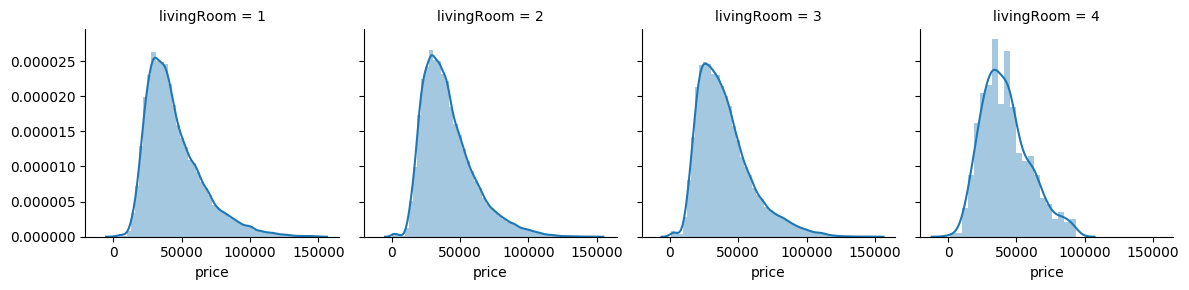

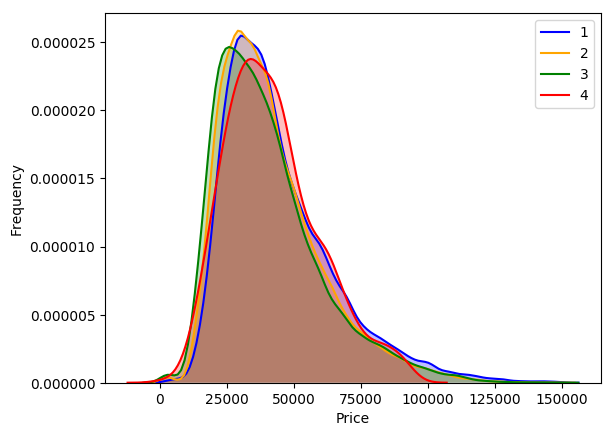

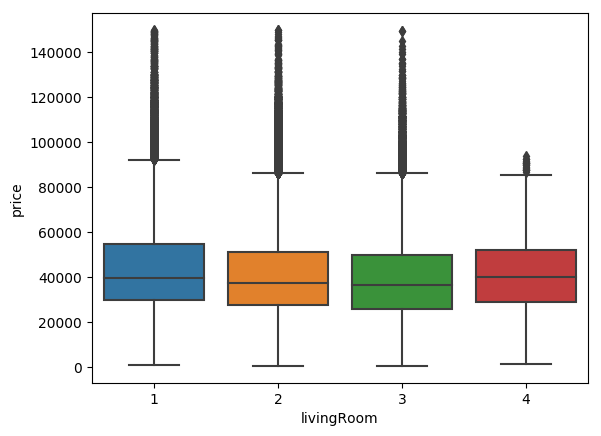

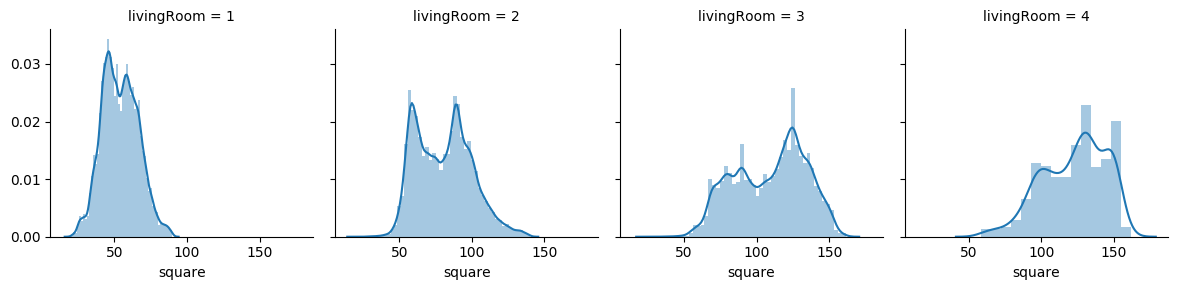

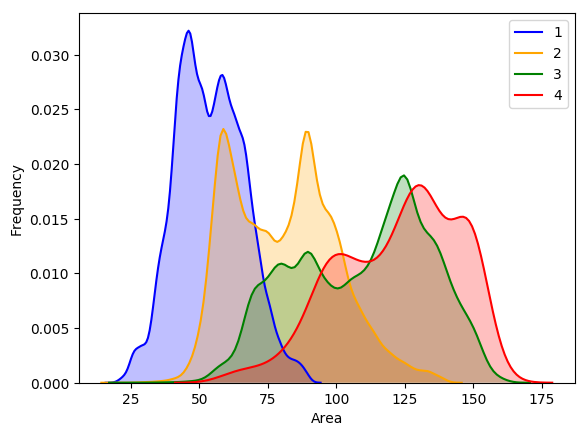

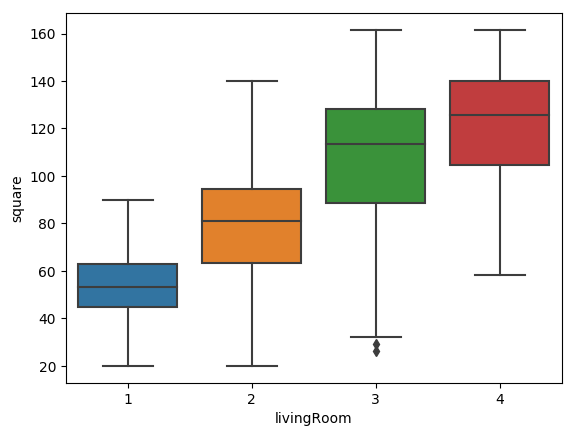

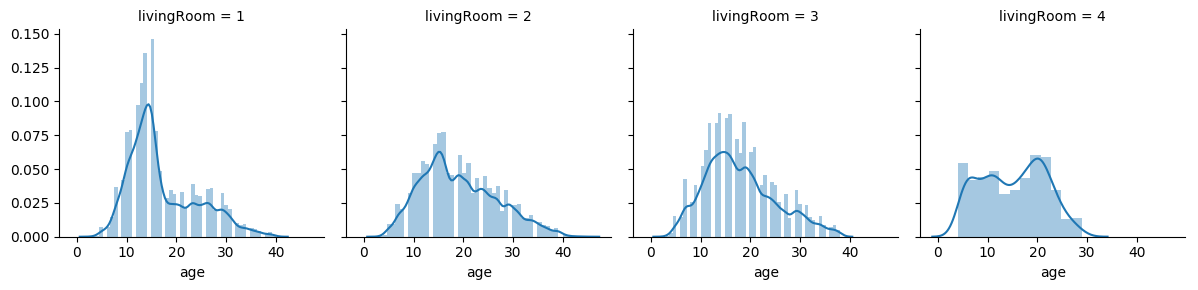

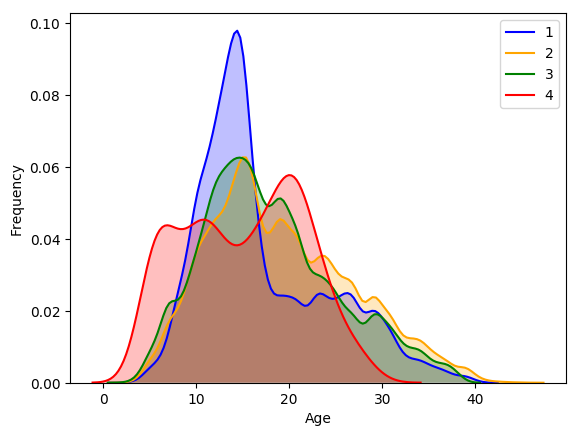

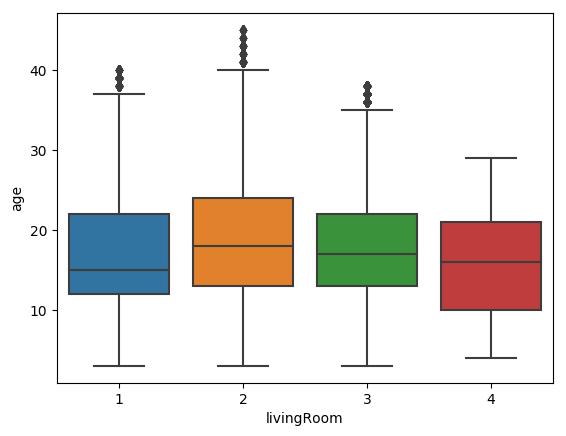

In [0]:
#%% Price Distribution by Number of livingRoom
g = sns.FacetGrid(data= df, col= 'livingRoom')
g = g.map(sns.distplot, 'price')
plt.savefig("Price 1", bbox_inches= "tight", dpi= 250)
plt.show()
plt.close()

g = sns.kdeplot(df["price"][(df["livingRoom"] == 1)], color="Blue", shade = True)
g = sns.kdeplot(df["price"][(df["livingRoom"] == 2)], ax =g, color="Orange", shade= True)
g = sns.kdeplot(df["price"][(df["livingRoom"] == 3)], ax =g, color="Green", shade= True)
g = sns.kdeplot(df["price"][(df["livingRoom"] == 4)], ax =g, color="Red", shade= True)
g.set_xlabel("Price")
g.set_ylabel("Frequency")
g = g.legend([1, 2, 3, 4])
plt.savefig("Price 2", bbox_inches= "tight", dpi= 250)
plt.show()
plt.close()


g = sns.boxplot(data= df, x= "livingRoom", y= "price")
g.set_xticklabels(labels = [1, 2, 3, 4])
plt.savefig("Price 3", bbox_inches= "tight", dpi= 250)
plt.show()
plt.close()

#%% Area Distribution by Number of livingRoom
g = sns.FacetGrid(data= df, col= 'livingRoom')
g = g.map(sns.distplot, 'square')
plt.savefig("Price 4", bbox_inches= "tight", dpi= 250)
plt.show()
plt.close()

g = sns.kdeplot(df["square"][(df["livingRoom"] == 1)], color="Blue", shade = True)
g = sns.kdeplot(df["square"][(df["livingRoom"] == 2)], ax =g, color="Orange", shade= True)
g = sns.kdeplot(df["square"][(df["livingRoom"] == 3)], ax =g, color="Green", shade= True)
g = sns.kdeplot(df["square"][(df["livingRoom"] == 4)], ax =g, color="Red", shade= True)
g.set_xlabel("Area")
g.set_ylabel("Frequency")
g = g.legend([1, 2, 3, 4])
plt.savefig("Price 5", bbox_inches= "tight", dpi= 250)
plt.show()
plt.close()


g = sns.boxplot(data= df, x= "livingRoom", y= "square")
g.set_xticklabels(labels = [1, 2, 3, 4])
plt.savefig("Price 6", bbox_inches= "tight", dpi= 250)
plt.show()
plt.close()

#%% Age Distribution by Number of livingRoom
g = sns.FacetGrid(data= df, col= 'livingRoom')
g = g.map(sns.distplot, 'age')
plt.savefig("Price 7", bbox_inches= "tight", dpi= 250)
plt.show()
plt.close()

g = sns.kdeplot(df["age"][(df["livingRoom"] == 1)], color="Blue", shade = True)
g = sns.kdeplot(df["age"][(df["livingRoom"] == 2)], ax =g, color="Orange", shade= True)
g = sns.kdeplot(df["age"][(df["livingRoom"] == 3)], ax =g, color="Green", shade= True)
g = sns.kdeplot(df["age"][(df["livingRoom"] == 4)], ax =g, color="Red", shade= True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g = g.legend([1, 2, 3, 4])
plt.savefig("Price 8", bbox_inches= "tight", dpi= 250)
plt.show()
plt.close()


g = sns.boxplot(data= df, x= "livingRoom", y= "age")
g.set_xticklabels(labels = [1, 2, 3, 4])
plt.savefig("Price 9", bbox_inches= "tight", dpi= 250)
plt.show()
plt.close()

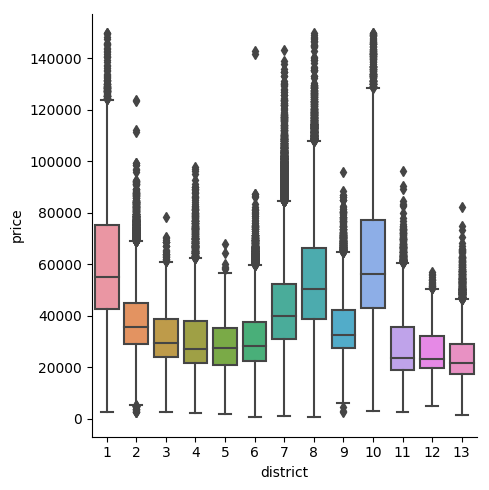

In [0]:
#%% District
g = sns.catplot(data= df, x= "district", y= "price", kind= "box")
plt.savefig("District Boxplot", bbox_inches= "tight", dpi= 250)
plt.show()
plt.close()

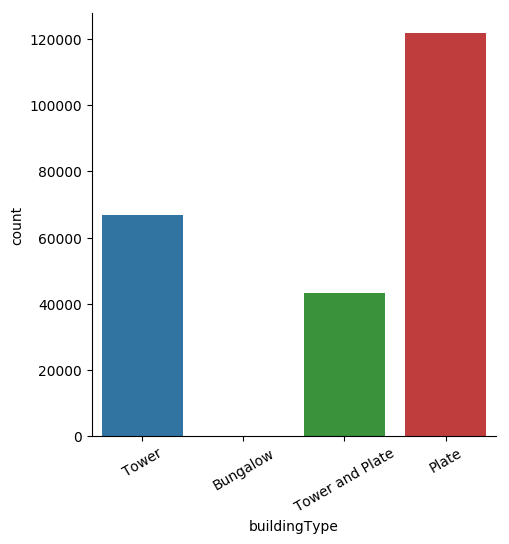

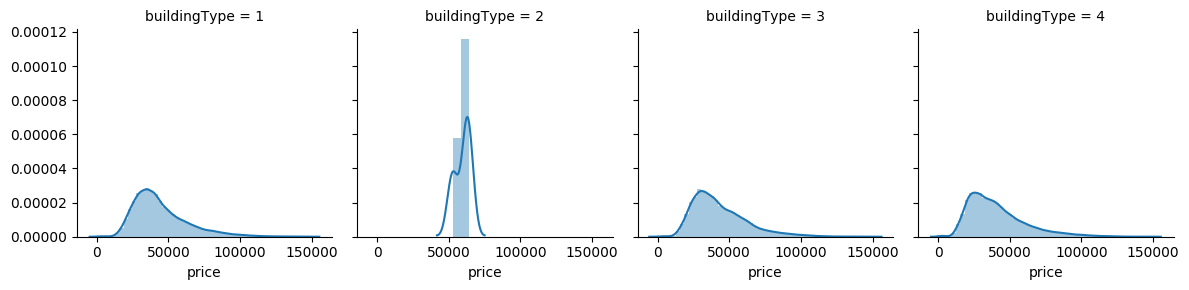

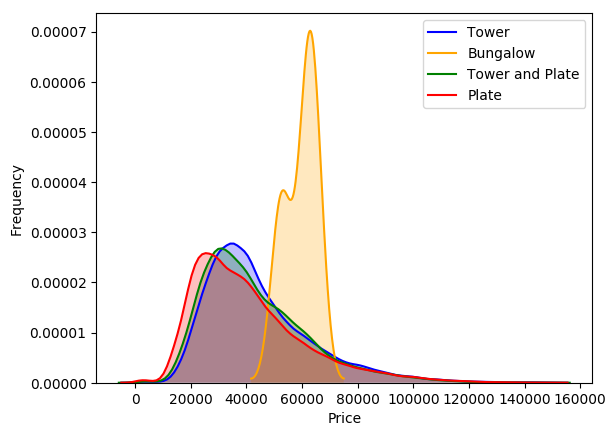

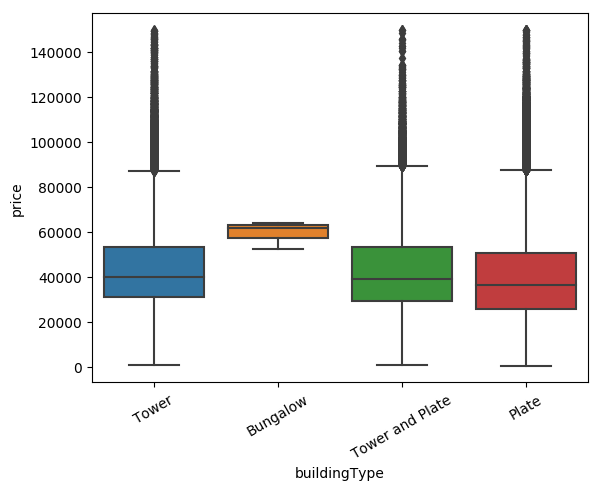

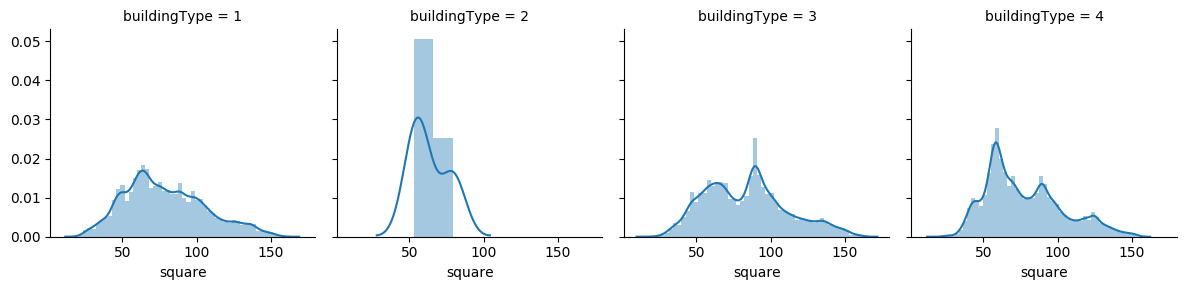

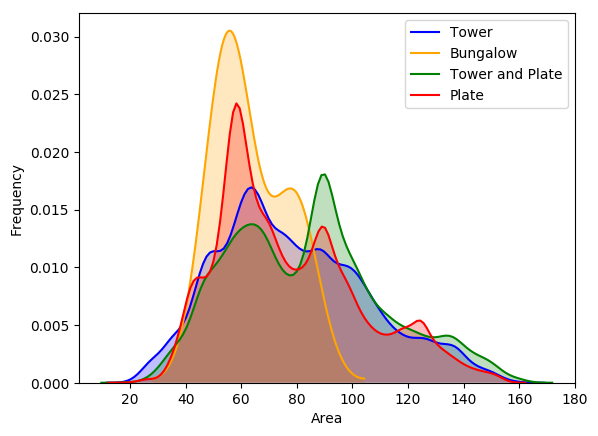

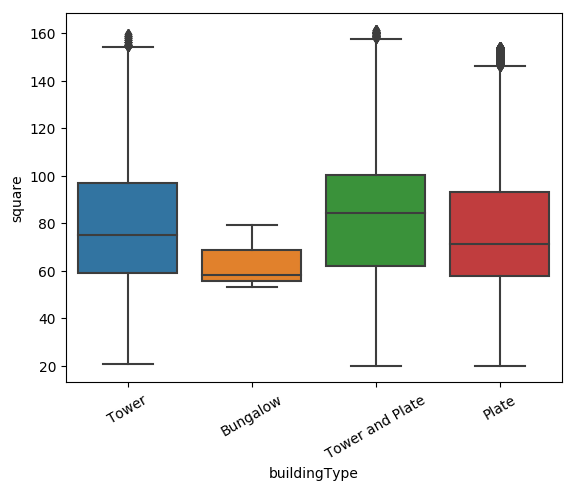

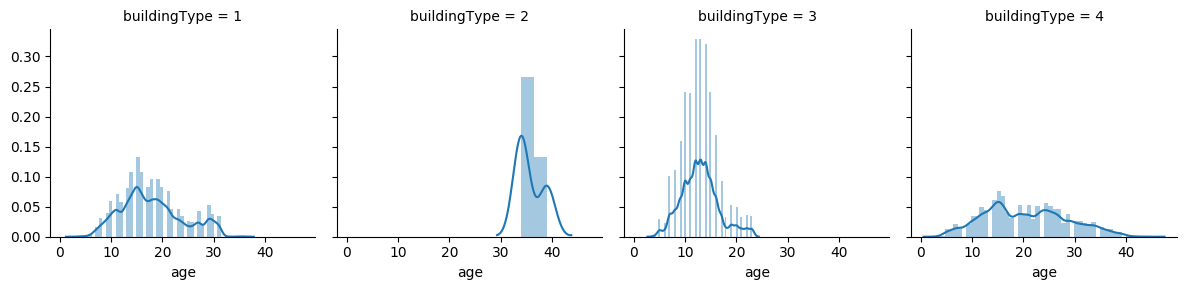

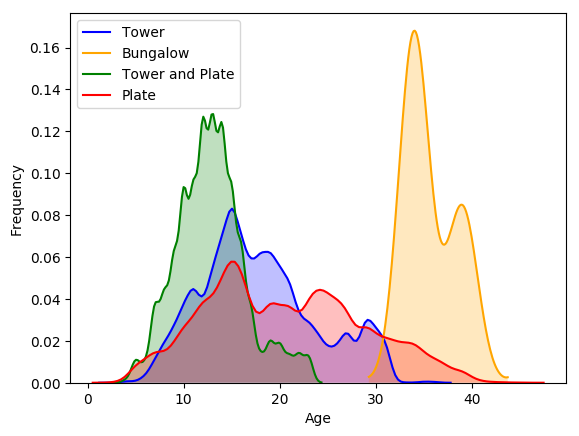

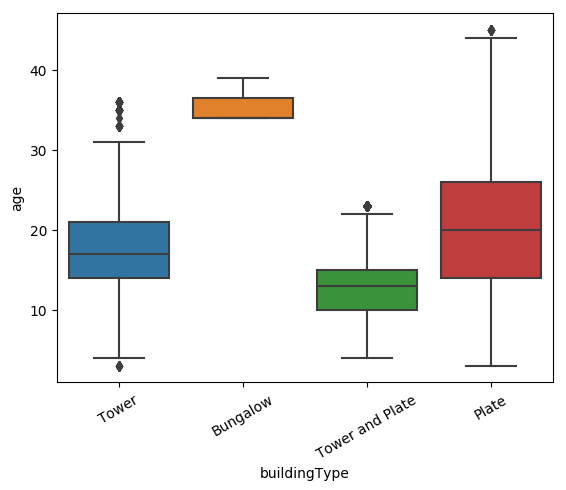

In [0]:
#%% BuildingType Count
g = sns.catplot(data= df, x= "buildingType", kind= "count")
g.set_xticklabels(['Tower', 'Bungalow', 'Tower and Plate', 'Plate'], rotation= 30)
plt.savefig("buildingType 1", bbox_inches= "tight", dpi= 250)
plt.show()
plt.close()

#%% Price Distribution by building Type
g = sns.FacetGrid(data= df, col= 'buildingType')
g = g.map(sns.distplot, 'price')
plt.savefig("buildingType 2", bbox_inches= "tight", dpi= 250)
plt.show()
plt.close()

g = sns.kdeplot(df["price"][(df["buildingType"] == 1)], color="Blue", shade = True)
g = sns.kdeplot(df["price"][(df["buildingType"] == 2)], ax =g, color="Orange", shade= True)
g = sns.kdeplot(df["price"][(df["buildingType"] == 3)], ax =g, color="Green", shade= True)
g = sns.kdeplot(df["price"][(df["buildingType"] == 4)], ax =g, color="Red", shade= True)
g.set_xlabel("Price")
g.set_ylabel("Frequency")
g = g.legend(['Tower', 'Bungalow', 'Tower and Plate', 'Plate'])
plt.savefig("buildingType 3", bbox_inches= "tight", dpi= 250)
plt.show()
plt.close()

g = sns.boxplot(data= df, x= "buildingType", y= "price")
g.set_xticklabels(labels= ['Tower', 'Bungalow', 'Tower and Plate', 'Plate'], rotation= 30)
plt.savefig("buildingType 4", bbox_inches= "tight", dpi= 250)
plt.show()
plt.close()

#%% Area Distribution by Building Type
g = sns.FacetGrid(data= df, col= 'buildingType')
g = g.map(sns.distplot, 'square')
plt.savefig("buildingType 5", bbox_inches= "tight", dpi= 250)
plt.show()
plt.close()

g = sns.kdeplot(df["square"][(df["buildingType"] == 1)], color="Blue", shade = True)
g = sns.kdeplot(df["square"][(df["buildingType"] == 2)], ax =g, color="Orange", shade= True)
g = sns.kdeplot(df["square"][(df["buildingType"] == 3)], ax =g, color="Green", shade= True)
g = sns.kdeplot(df["square"][(df["buildingType"] == 4)], ax =g, color="Red", shade= True)
g.set_xlabel("Area")
g.set_ylabel("Frequency")
g = g.legend(['Tower', 'Bungalow', 'Tower and Plate', 'Plate'])
plt.savefig("buildingType 6", bbox_inches= "tight", dpi= 250)
plt.show()
plt.close()

g = sns.boxplot(data= df, x= "buildingType", y= "square")
g.set_xticklabels(labels= ['Tower', 'Bungalow', 'Tower and Plate', 'Plate'], rotation= 30)
plt.savefig("buildingType 7", bbox_inches= "tight", dpi= 250)
plt.show()
plt.close()

#%% Age Distribution by Building Type
g = sns.FacetGrid(data= df, col= 'buildingType')
g = g.map(sns.distplot, 'age')
plt.savefig("buildingType 8", bbox_inches= "tight", dpi= 250)
plt.show()
plt.close()

g = sns.kdeplot(df["age"][(df["buildingType"] == 1)], color="Blue", shade = True)
g = sns.kdeplot(df["age"][(df["buildingType"] == 2)], ax =g, color="Orange", shade= True)
g = sns.kdeplot(df["age"][(df["buildingType"] == 3)], ax =g, color="Green", shade= True)
g = sns.kdeplot(df["age"][(df["buildingType"] == 4)], ax =g, color="Red", shade= True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g = g.legend(['Tower', 'Bungalow', 'Tower and Plate', 'Plate'])
plt.savefig("buildingType 9", bbox_inches= "tight", dpi= 250)
plt.show()
plt.close()

g = sns.boxplot(data= df, x= "buildingType", y= "age")
g.set_xticklabels(labels= ['Tower', 'Bungalow', 'Tower and Plate', 'Plate'], rotation= 30)
plt.savefig("buildingType 10", bbox_inches= "tight", dpi= 250)
plt.show()
plt.close()

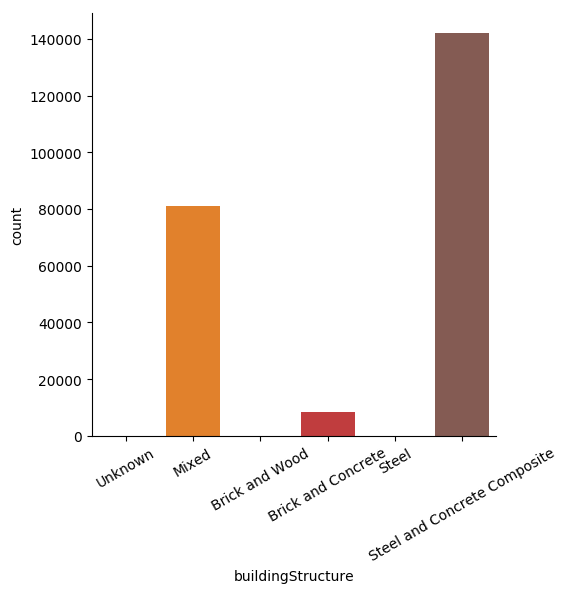

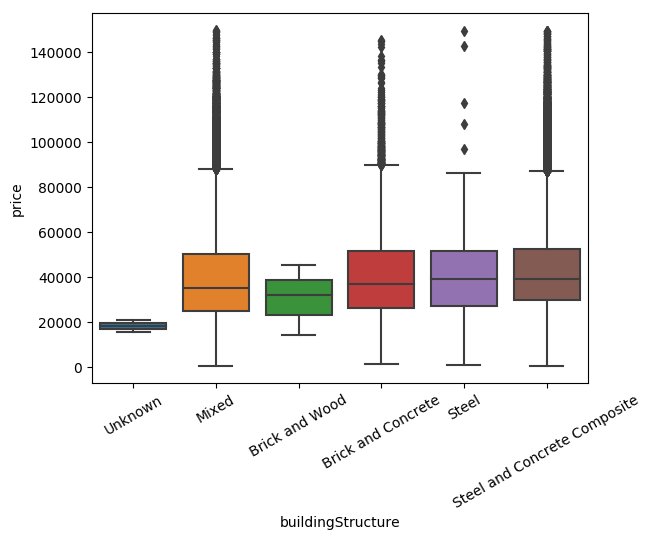

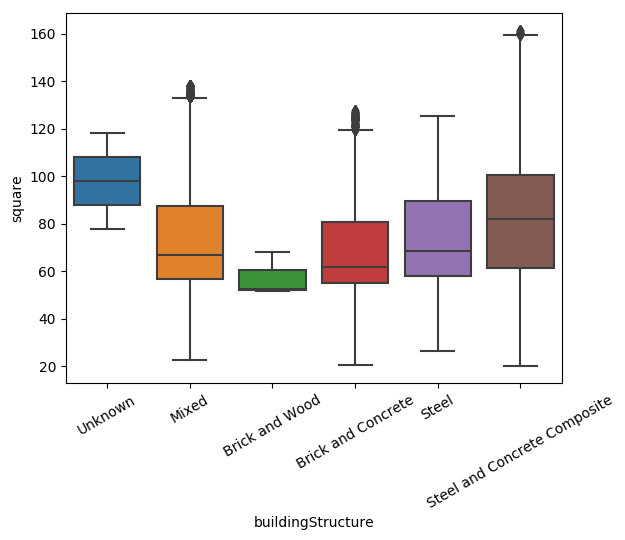

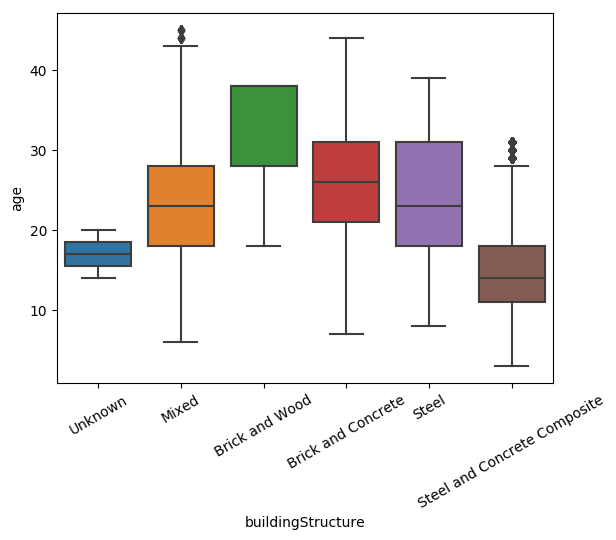

In [0]:
#%% BuildingStructure Count
g = sns.catplot(data= df, x= "buildingStructure", kind= "count")
g.set_xticklabels(['Unknown', 'Mixed', 'Brick and Wood', 'Brick and Concrete', 'Steel', 'Steel and Concrete Composite'], rotation= 30)
plt.savefig("buildingStructure 1", bbox_inches= "tight", dpi= 250)
plt.show()
plt.close()

#%% Price Distribution by Building Structure
g = sns.boxplot(data= df, x= "buildingStructure", y= "price")
g.set_xticklabels(labels= ['Unknown', 'Mixed', 'Brick and Wood', 'Brick and Concrete', 'Steel', 'Steel and Concrete Composite'], rotation= 30)
plt.savefig("buildingStructure 2", bbox_inches= "tight", dpi= 250)
plt.show()
plt.close()

#%% Area Distribution by Building Structure
g = sns.boxplot(data= df, x= "buildingStructure", y= "square")
g.set_xticklabels(labels= ['Unknown', 'Mixed', 'Brick and Wood', 'Brick and Concrete', 'Steel', 'Steel and Concrete Composite'], rotation= 30)
plt.savefig("buildingStructure 3", bbox_inches= "tight", dpi= 250)
plt.show()
plt.close()

#%% Age Distribution by Building Structure
g = sns.boxplot(data= df, x= "buildingStructure", y= "age")
g.set_xticklabels(labels= ['Unknown', 'Mixed', 'Brick and Wood', 'Brick and Concrete', 'Steel', 'Steel and Concrete Composite'], rotation= 30)
plt.savefig("buildingStructure 4", bbox_inches= "tight", dpi= 250)
plt.show()
plt.close()

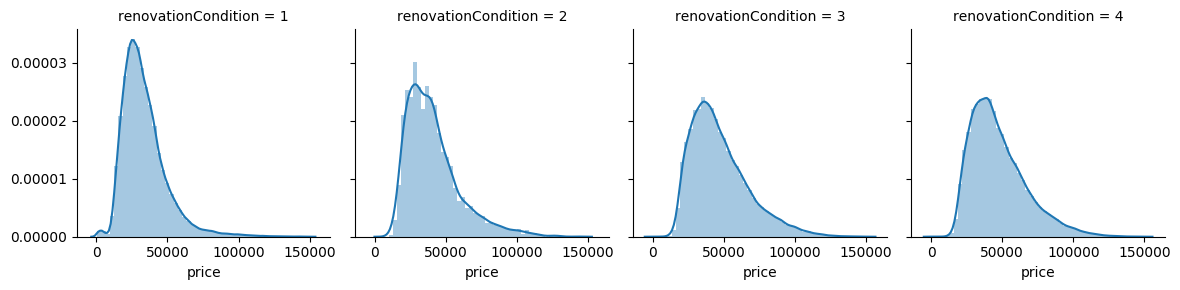

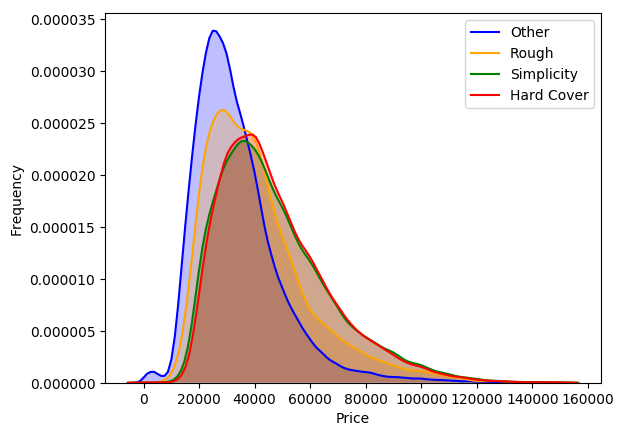

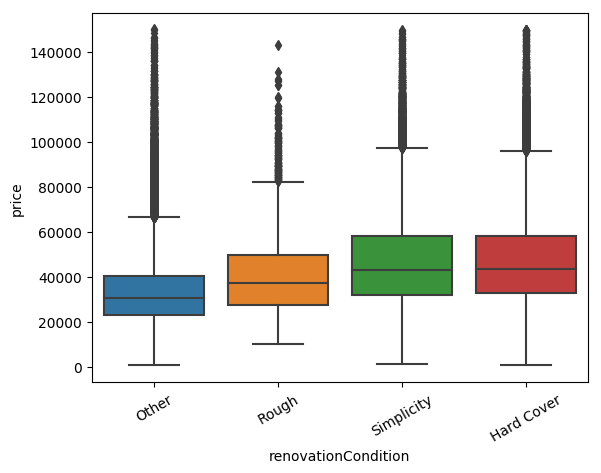

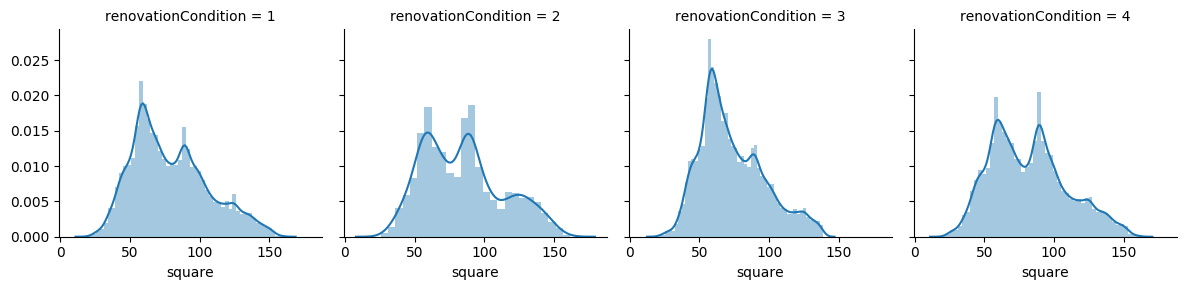

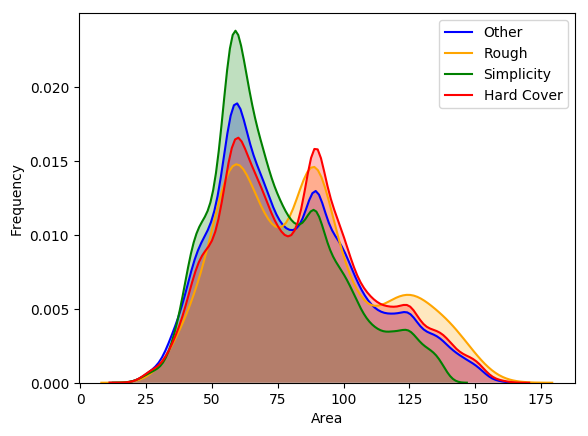

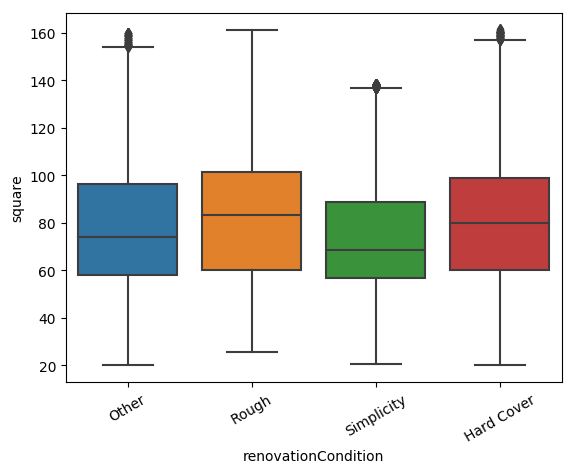

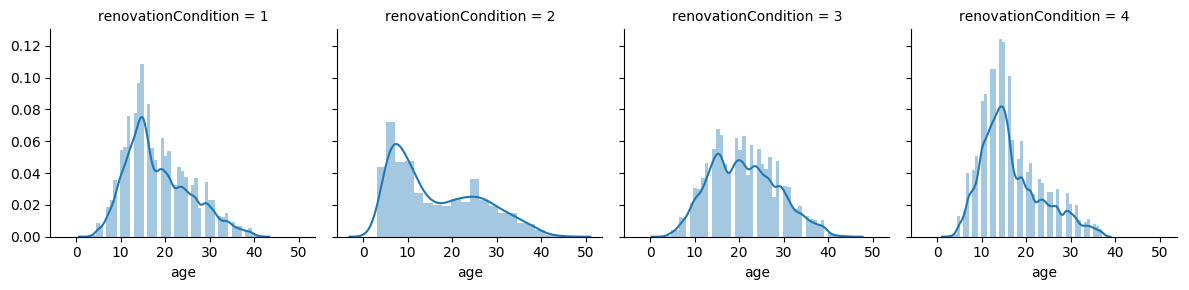

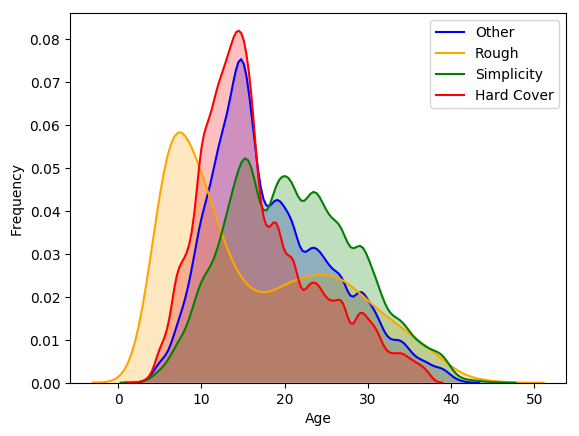

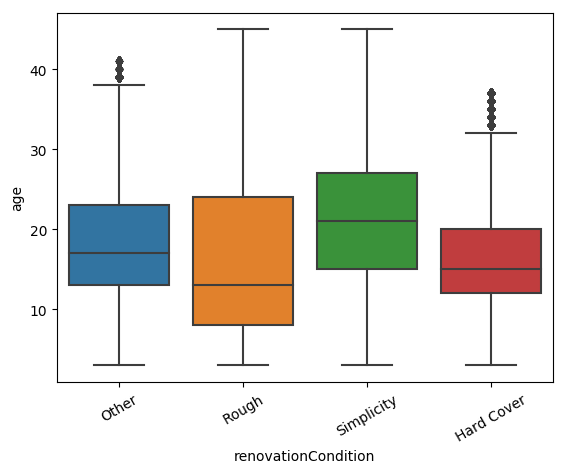

In [0]:
#%% Price Distribution by Renovation Condition
g = sns.FacetGrid(data= df, col= 'renovationCondition')
g = g.map(sns.distplot, 'price')
plt.savefig("renovationCondition 1", bbox_inches= "tight", dpi= 250)
plt.show()
plt.close()

g = sns.kdeplot(df["price"][(df["renovationCondition"] == 1)], color="Blue", shade = True)
g = sns.kdeplot(df["price"][(df["renovationCondition"] == 2)], ax =g, color="Orange", shade= True)
g = sns.kdeplot(df["price"][(df["renovationCondition"] == 3)], ax =g, color="Green", shade= True)
g = sns.kdeplot(df["price"][(df["renovationCondition"] == 4)], ax =g, color="Red", shade= True)
g.set_xlabel("Price")
g.set_ylabel("Frequency")
g = g.legend(['Other', 'Rough', 'Simplicity', 'Hard Cover'])
plt.savefig("renovationCondition 2", bbox_inches= "tight", dpi= 250)
plt.show()
plt.close()

g = sns.boxplot(data= df, x= "renovationCondition", y= "price")
g.set_xticklabels(labels= ['Other', 'Rough', 'Simplicity', 'Hard Cover'], rotation= 30)
plt.savefig("renovationCondition 3", bbox_inches= "tight", dpi= 250)

#%% Area Distribution by Renovation Condition
g = sns.FacetGrid(data= df, col= 'renovationCondition')
g = g.map(sns.distplot, 'square')
plt.savefig("renovationCondition 4", bbox_inches= "tight", dpi= 250)
plt.show()
plt.close()

g = sns.kdeplot(df["square"][(df["renovationCondition"] == 1)], color="Blue", shade = True)
g = sns.kdeplot(df["square"][(df["renovationCondition"] == 2)], ax =g, color="Orange", shade= True)
g = sns.kdeplot(df["square"][(df["renovationCondition"] == 3)], ax =g, color="Green", shade= True)
g = sns.kdeplot(df["square"][(df["renovationCondition"] == 4)], ax =g, color="Red", shade= True)
g.set_xlabel("Area")
g.set_ylabel("Frequency")
g = g.legend(['Other', 'Rough', 'Simplicity', 'Hard Cover'])
plt.savefig("renovationCondition 5", bbox_inches= "tight", dpi= 250)
plt.show()
plt.close()

g = sns.boxplot(data= df, x= "renovationCondition", y= "square")
g.set_xticklabels(labels= ['Other', 'Rough', 'Simplicity', 'Hard Cover'], rotation= 30)
plt.savefig("renovationCondition 6", bbox_inches= "tight", dpi= 250)

#%% Age Distribution by Renovation Condition
g = sns.FacetGrid(data= df, col= 'renovationCondition')
g = g.map(sns.distplot, 'age')
plt.savefig("renovationCondition 7", bbox_inches= "tight", dpi= 250)
plt.show()
plt.close()

g = sns.kdeplot(df["age"][(df["renovationCondition"] == 1)], color="Blue", shade = True)
g = sns.kdeplot(df["age"][(df["renovationCondition"] == 2)], ax =g, color="Orange", shade= True)
g = sns.kdeplot(df["age"][(df["renovationCondition"] == 3)], ax =g, color="Green", shade= True)
g = sns.kdeplot(df["age"][(df["renovationCondition"] == 4)], ax =g, color="Red", shade= True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g = g.legend(['Other', 'Rough', 'Simplicity', 'Hard Cover'])
plt.savefig("renovationCondition 8", bbox_inches= "tight", dpi= 250)
plt.show()
plt.close()

g = sns.boxplot(data= df, x= "renovationCondition", y= "age")
g.set_xticklabels(labels= ['Other', 'Rough', 'Simplicity', 'Hard Cover'], rotation= 30)
plt.savefig("renovationCondition 9", bbox_inches= "tight", dpi= 250)

In [0]:
df["floorType"].unique()

array(['High', 'Bottom', 'Middle', 'Low', 'Top', 'Unknown'], dtype=object)

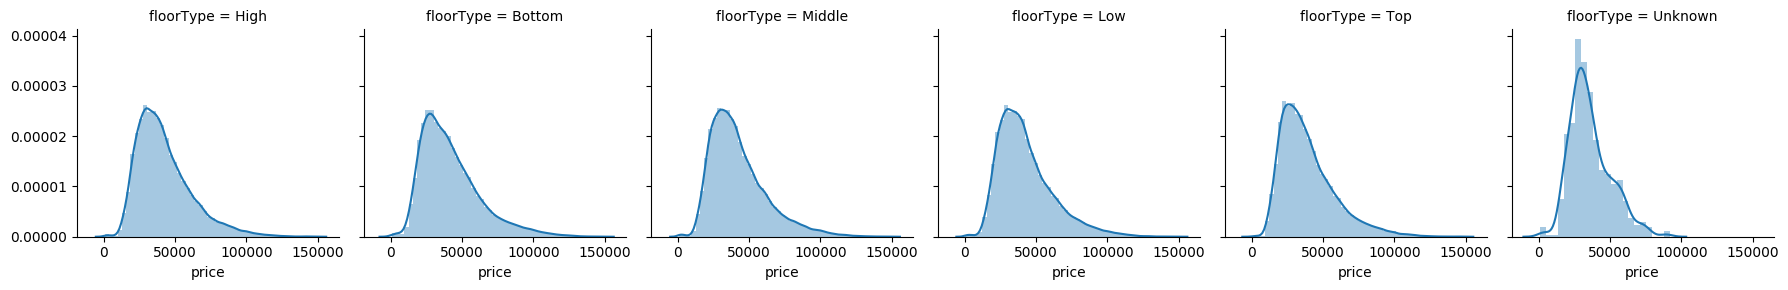

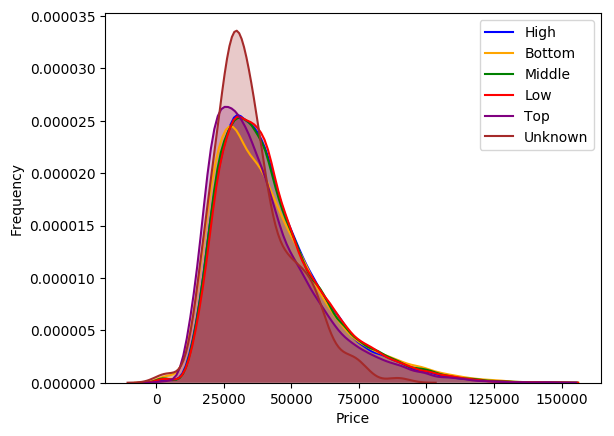

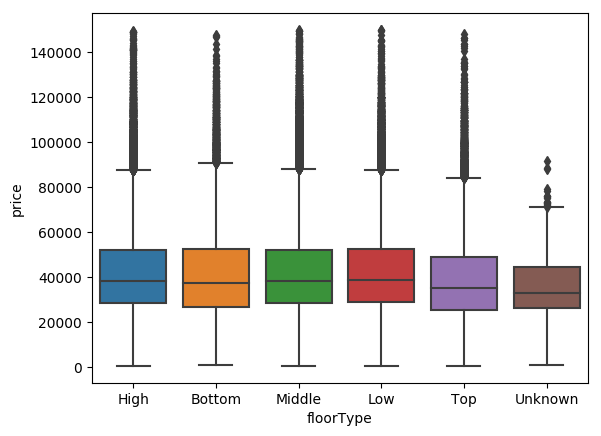

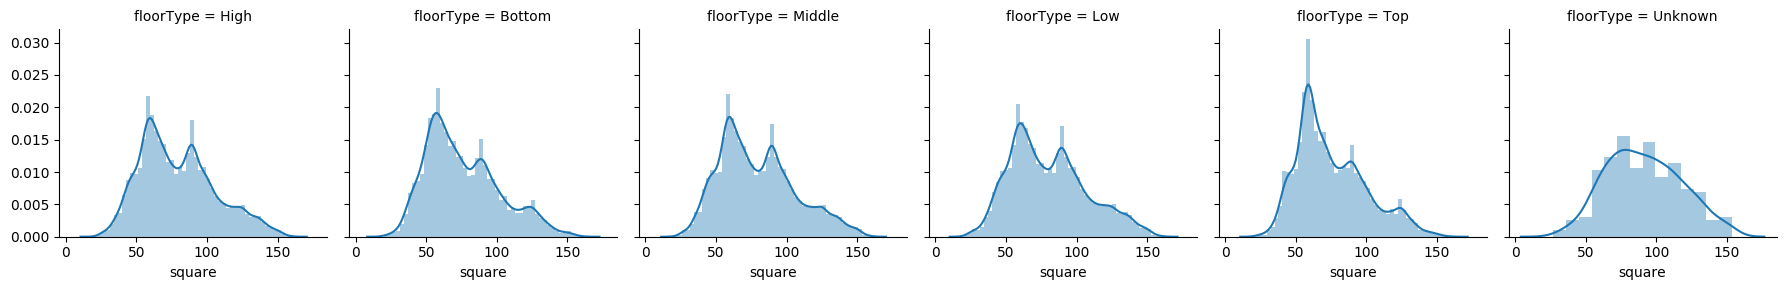

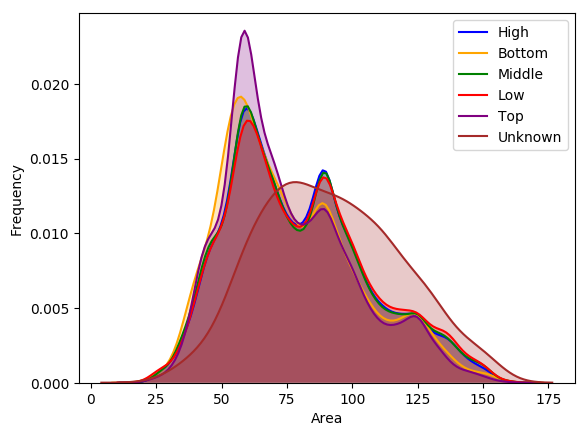

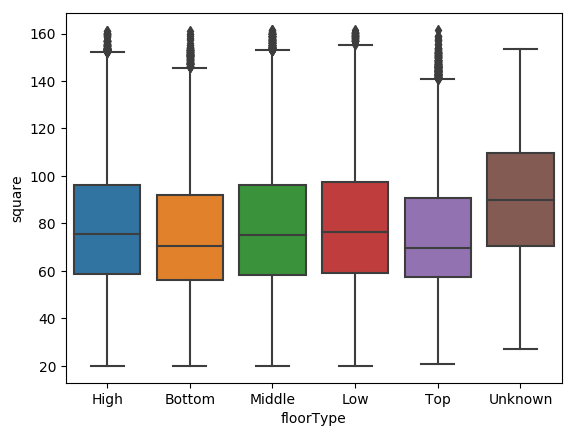

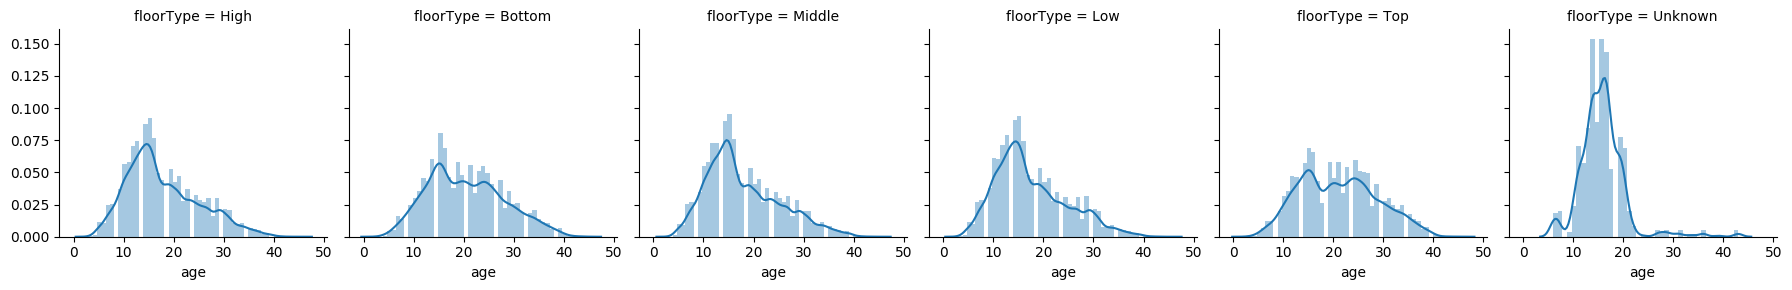

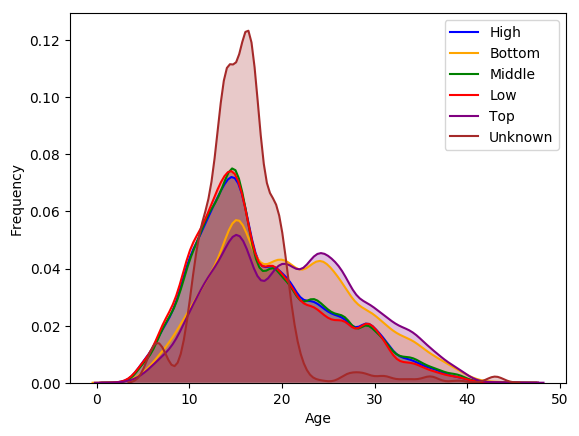

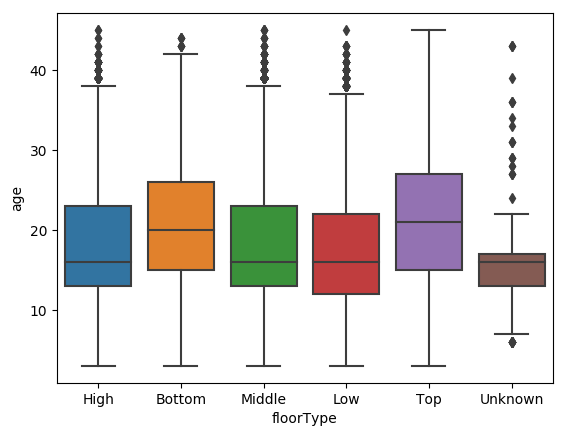

In [0]:
#%% Price Distribution by Floor Type
g = sns.FacetGrid(data= df, col= 'floorType')
g = g.map(sns.distplot, 'price')
plt.savefig("floorType 1", bbox_inches= "tight", dpi= 250)
plt.show()
plt.close()

g = sns.kdeplot(df["price"][(df["floorType"] == "High")], color="Blue", shade = True)
g = sns.kdeplot(df["price"][(df["floorType"] == "Bottom")], ax =g, color="Orange", shade= True)
g = sns.kdeplot(df["price"][(df["floorType"] == "Middle")], ax =g, color="Green", shade= True)
g = sns.kdeplot(df["price"][(df["floorType"] == "Low")], ax =g, color="Red", shade= True)
g = sns.kdeplot(df["price"][(df["floorType"] == "Top")], ax =g, color="Purple", shade= True)
g = sns.kdeplot(df["price"][(df["floorType"] == "Unknown")], ax =g, color="Brown", shade= True)
g.set_xlabel("Price")
g.set_ylabel("Frequency")
g = g.legend(['High', 'Bottom', 'Middle', 'Low', 'Top', 'Unknown'])
plt.savefig("floorType 2", bbox_inches= "tight", dpi= 250)
plt.show()
plt.close()

g = sns.boxplot(data= df, x= "floorType", y= "price")
plt.savefig("floorType 3", bbox_inches= "tight", dpi= 250)

#%% Area Distribution by Floor Type
g = sns.FacetGrid(data= df, col= 'floorType')
g = g.map(sns.distplot, 'square')
plt.savefig("floorType 4", bbox_inches= "tight", dpi= 250)
plt.show()
plt.close()

g = sns.kdeplot(df["square"][(df["floorType"] == "High")], color="Blue", shade = True)
g = sns.kdeplot(df["square"][(df["floorType"] == "Bottom")], ax =g, color="Orange", shade= True)
g = sns.kdeplot(df["square"][(df["floorType"] == "Middle")], ax =g, color="Green", shade= True)
g = sns.kdeplot(df["square"][(df["floorType"] == "Low")], ax =g, color="Red", shade= True)
g = sns.kdeplot(df["square"][(df["floorType"] == "Top")], ax =g, color="Purple", shade= True)
g = sns.kdeplot(df["square"][(df["floorType"] == "Unknown")], ax =g, color="Brown", shade= True)
g.set_xlabel("Area")
g.set_ylabel("Frequency")
g = g.legend(['High', 'Bottom', 'Middle', 'Low', 'Top', 'Unknown'])
plt.savefig("floorType 5", bbox_inches= "tight", dpi= 250)
plt.show()
plt.close()

g = sns.boxplot(data= df, x= "floorType", y= "square")
plt.savefig("floorType 6", bbox_inches= "tight", dpi= 250)

#%% Age Distribution by Renovation Condition
g = sns.FacetGrid(data= df, col= 'floorType')
g = g.map(sns.distplot, 'age')
plt.savefig("floorType 7", bbox_inches= "tight", dpi= 250)
plt.show()
plt.close()

g = sns.kdeplot(df["age"][(df["floorType"] == "High")], color="Blue", shade = True)
g = sns.kdeplot(df["age"][(df["floorType"] == "Bottom")], ax =g, color="Orange", shade= True)
g = sns.kdeplot(df["age"][(df["floorType"] == "Middle")], ax =g, color="Green", shade= True)
g = sns.kdeplot(df["age"][(df["floorType"] == "Low")], ax =g, color="Red", shade= True)
g = sns.kdeplot(df["age"][(df["floorType"] == "Top")], ax =g, color="Purple", shade= True)
g = sns.kdeplot(df["age"][(df["floorType"] == "Unknown")], ax =g, color="Brown", shade= True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g = g.legend(['High', 'Bottom', 'Middle', 'Low', 'Top', 'Unknown'])
plt.savefig("floorType 8", bbox_inches= "tight", dpi= 250)
plt.show()
plt.close()

g = sns.boxplot(data= df, x= "floorType", y= "age")
plt.savefig("floorType 9", bbox_inches= "tight", dpi= 250)
